In [1]:
from gluonts.dataset.repository.datasets import get_dataset
import pandas as pd
import yaml
import io


from gluonts.dataset.util import to_pandas
import matplotlib.pyplot as plt

In [2]:
dataset_names = ['constant', 'exchange_rate', 'solar-energy', 'electricity',
                 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips',
                 'solar_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing',
                 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly',
                 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing',
                 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'm3_monthly',
                 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 
                 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5']

In [392]:
not_yet_included = [9, 10, 11, 12, 13, 30, 31, 32]

In [393]:
dataset_n = 33
dataset_names[dataset_n]

'm5'

In [398]:
ds = get_dataset(dataset_names[dataset_n])


RuntimeError: M5 data is available on Kaggle (https://www.kaggle.com/c/m5-forecasting-accuracy/data). You first need to agree to the terms of the competition before being able to download the data. After you have done that, please supply the files at /Users/polina/.mxnet/gluon-ts/datasets/m5.

<AxesSubplot:>

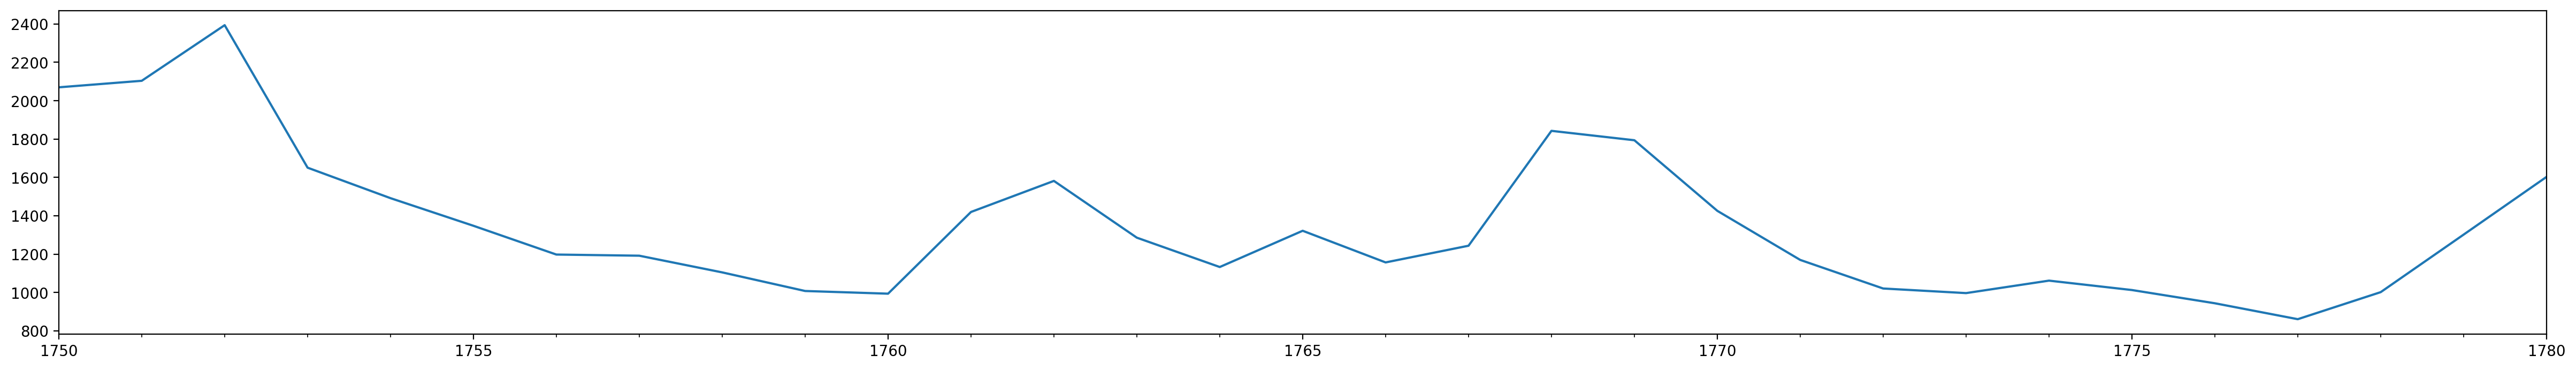

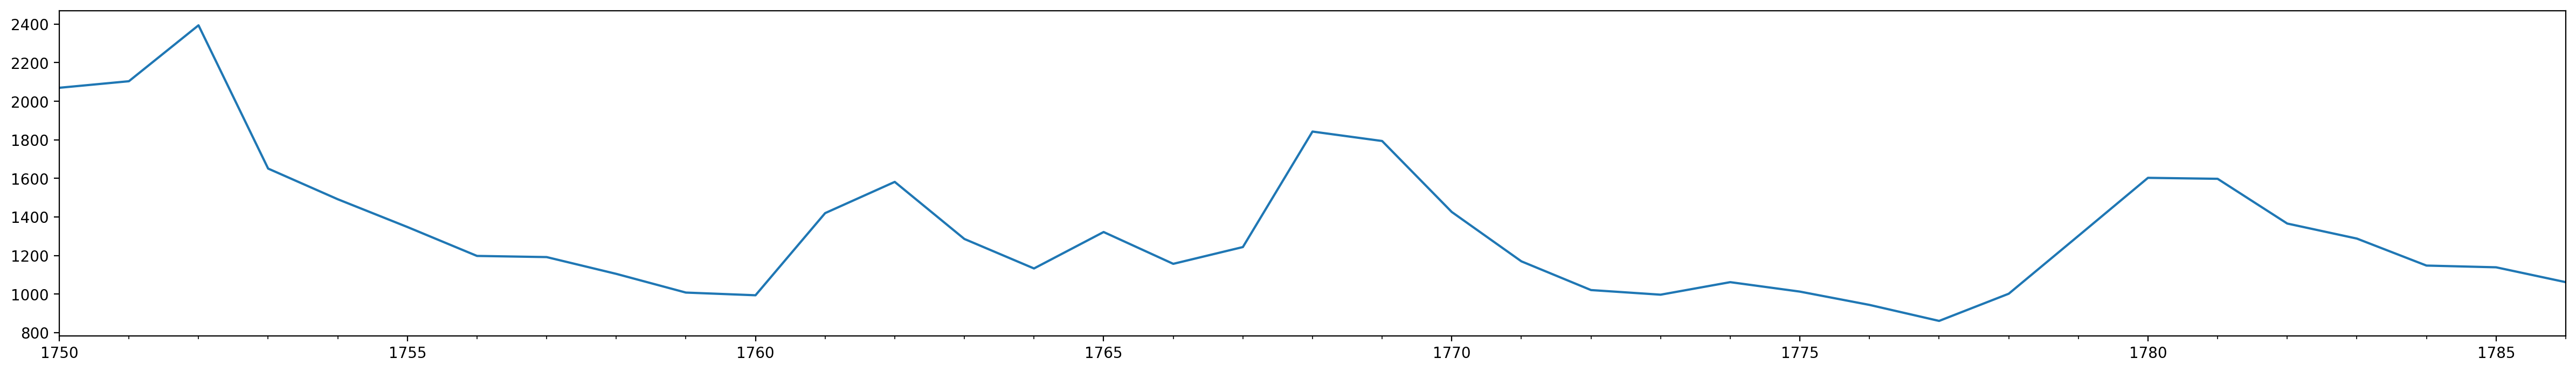

In [388]:
plt.figure(figsize = (30, 4), dpi = 200)
to_pandas(list(ds.train)[1]).plot()
plt.figure(figsize = (30, 4), dpi = 200)
to_pandas(list(ds.test)[1]).plot()

In [389]:
to_pandas(list(ds.train)[1]).reset_index().merge(to_pandas(list(ds.test)[1]).reset_index(), how = 'outer')

,index,0
0,1750-12-31,2070.0
1,1751-12-31,2104.0
2,1752-12-31,2394.0
3,1753-12-31,1651.0
4,1754-12-31,1492.0
5,1755-12-31,1348.0
6,1756-12-31,1198.0
7,1757-12-31,1192.0
8,1758-12-31,1105.0
9,1759-12-31,1008.0


In [390]:
len(list(ds.train))

22974

In [391]:
to_pandas(list(ds.train)[0]).shape

(31,)

In [366]:
for ts in range(len(list(ds.train))):
#     df = to_pandas(list(ds.train)[ts]).reset_index()
    df = to_pandas(list(ds.train)[1]).reset_index().merge(to_pandas(list(ds.test)[1]).reset_index(), how = 'outer')
    df.columns = ['ds', 'y']    
    df.to_pickle(f'../data/02_intermediate/{dataset_names[dataset_n]}_{ts}.pickle')

In [367]:
with open("../conf/base/parameters.yml", 'r') as stream:
    try:
        d = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [368]:
d[dataset_names[dataset_n]]

KeyError: 'm4_weekly'

In [369]:
{dataset_names[dataset_n]: {'freq': ds.metadata.freq, 'nan_interpolation': 'linear'}}

{'m4_weekly': {'freq': 'W', 'nan_interpolation': 'linear'}}

In [370]:
d.update({dataset_names[dataset_n]: {'freq': ds.metadata.freq, 'nan_interpolation': 'linear'}})

In [371]:
# Write YAML file
with io.open("../conf/base/parameters.yml", 'w', encoding='utf8') as outfile:
    yaml.dump(d, outfile, default_flow_style=False, allow_unicode=True)


In [372]:
f'../data/02_intermediate/{dataset_names[dataset_n]}_{ts}.pickle'

'../data/02_intermediate/m4_weekly_358.pickle'

In [373]:
pd.read_pickle(f'../data/02_intermediate/{dataset_names[dataset_n]}_{ts}.pickle')

,ds,y
0,1750-01-04,195.927994
1,1750-01-11,194.796005
2,1750-01-18,192.710007
3,1750-01-25,190.287994
4,1750-02-01,188.770004
...,...,...
1718,1782-12-08,3638.559082
1719,1782-12-15,3635.781006
1720,1782-12-22,3522.327881
1721,1782-12-29,3458.631104


In [54]:
a = {'input': 'exchange_rate'}

In [55]:
a['input']

'exchange_rate'

In [56]:
import re

In [66]:
pattern = re.compile(fr'^{a["input"]}_\d')

In [77]:
a = 'exchange_rate'

In [82]:
a.split('_')[-1].isnumeric()

False

In [71]:
list_ds = ['exchange_rate', 'exchange', 'exchange_rate_nips', 'exchange_rate_4', 'exchange_rate_45']

In [72]:
[i for i in list_ds if pattern.match(i)]

['exchange_rate_4', 'exchange_rate_45']